# Layout

## Layout driven flow

You can import the PDK and layout any of the standard cells

In [1]:
import gdsfactory as gf
from gdsfactory.config import rich_output
gf.config.rich_output()

In [2]:
import sky130
import sky130.components as sc
import sky130.tech as st

2024-05-23 13:58:07.393 | INFO     | gdsfactory.pdk:register_cells_yaml:376 - Registered cell 'sample'


If you want to see what are the cells available:

In [3]:
# sky130.cells

In [4]:
# sky130.cross_sections

Let's explore the available layers:

In [5]:
# help(gf.pdk)
# help(gf.get_active_pdk().get_layer_stack)
# gf.pdk.get_layer_stack()

You can also verify this is the active PDK on `gdsfactory`:

In [6]:
gf.pdk.get_active_pdk().name

'sky130'

Now, let's explore available symbols for the components:

In [7]:
# dir(sky130)
sky130

<module 'sky130' from '/home/daquintero/phd/collaborate/skywater130/sky130/__init__.py'>

Let's try exploring an example basic `nfet`:

sky130_fd_pr__rf_nfet_01v8_aM02W1p65L0p15: uid d7772405, ports ['DRAIN', 'SOURCE', 'GATE', 'SUBSTRATE', 'GATE1', 'SUBSTRATE1'], references [], 97 polygons

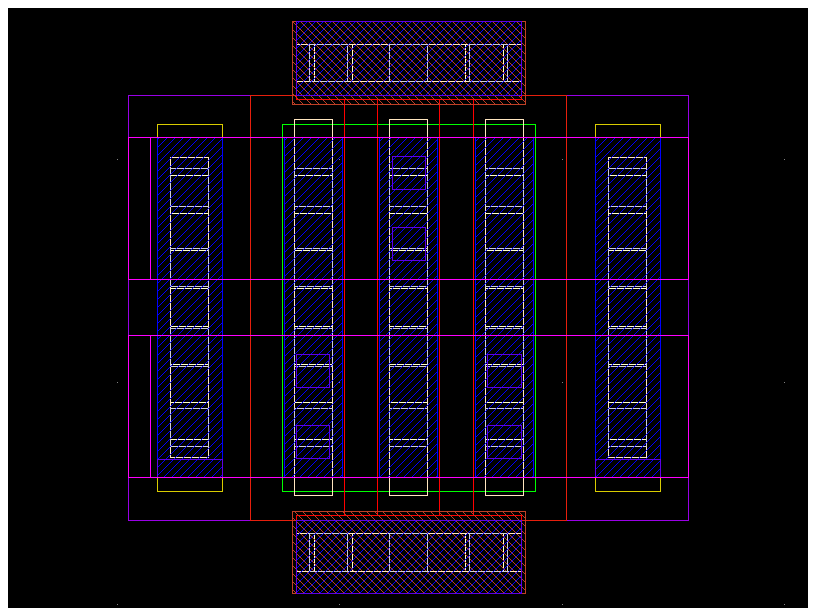

In [15]:
c = sc.sky130_fd_pr__rf_nfet_01v8_aM02W1p65L0p15()
c

Explore it's ports:

In [9]:
c.ports


{
    'DRAIN': {'name': 'DRAIN', 'width': 0.2, 'center': [0.15, 1.78], 'layer': [69, 20], 'port_type': 'electrical'},
    'SOURCE': {'name': 'SOURCE', 'width': 0.2, 'center': [0.15, 0.89], 'layer': [69, 20], 'port_type': 'electrical'},
    'GATE': {'name': 'GATE', 'width': 0.2, 'center': [1.31, 2.435], 'layer': [68, 20], 'port_type': 'electrical'},
    'SUBSTRATE': {'name': 'SUBSTRATE', 'width': 0.2, 'center': [0.32, 0.65], 'layer': [68, 20], 'port_type': 'electrical'},
    'GATE1': {'name': 'GATE1', 'width': 0.2, 'center': [1.31, 0.235], 'layer': [68, 20], 'port_type': 'electrical'},
    'SUBSTRATE1': {'name': 'SUBSTRATE1', 'width': 0.2, 'center': [2.29, 0.65], 'layer': [68, 20], 'port_type': 'electrical'}
}

We can also explore the digital cells:

2024-05-23 13:58:08.005 | WARNING  | sky130.components:sky130_fd_sc_hd__a2111o_1:5638 - UserWarning: decorator is deprecated and will be removed soon. import_gds


2024-05-23 13:58:08.009 | WARNING  | gdsfactory.klive:show:49 - UserWarning: Could not connect to klive server. Is klayout open and klive plugin installed?


sky130_fd_sc_hd__a2111o_1: uid 9695ee2b, ports ['VGND', 'VPWR'], references [], 98 polygons

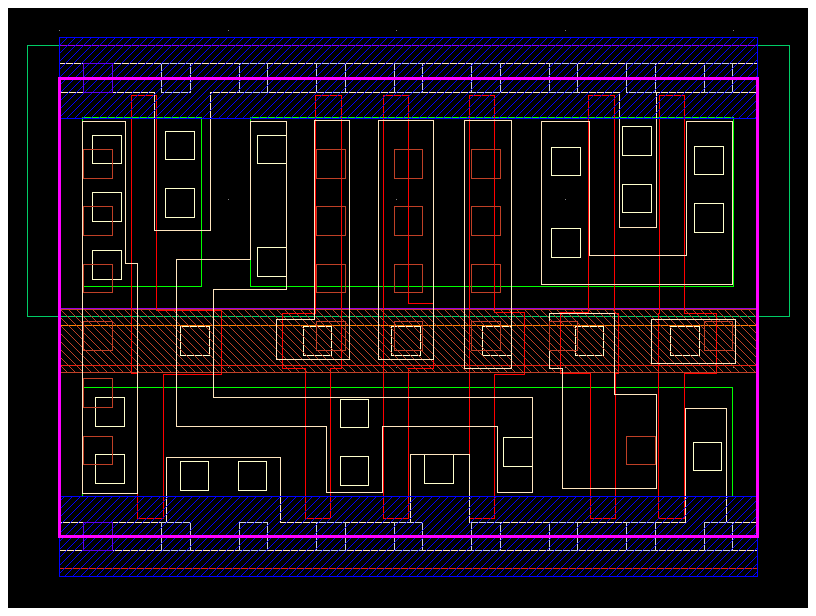

In [10]:
c = sc.sky130_fd_sc_hd__a2111o_1()
c

In [11]:
scene = c.to_3d()
scene.show()

<IPython.core.display.HTML object>

TODO: add Parametric cells natively into gdsfactory `sky130` pdk.

2024-05-23 13:58:08.527 | WARNING  | sky130.components:sky130_fd_sc_hd__a311oi_4:5980 - UserWarning: decorator is deprecated and will be removed soon. import_gds


2024-05-23 13:58:08.540 | WARNING  | gdsfactory.show:show:47 - UserWarning: Unnamed cells, 1 in 'Unnamed_6c622524'
2024-05-23 13:58:08.542 | WARNING  | gdsfactory.component:plot_klayout:1645 - UserWarning: Unnamed cells, 1 in 'Unnamed_6c622524'


Unnamed_6c622524: uid 6c622524, ports [], references ['sky130_fd_sc_hd__a2111o_1_1', 'sky130_fd_sc_hd__a311oi_4_1'], 0 polygons

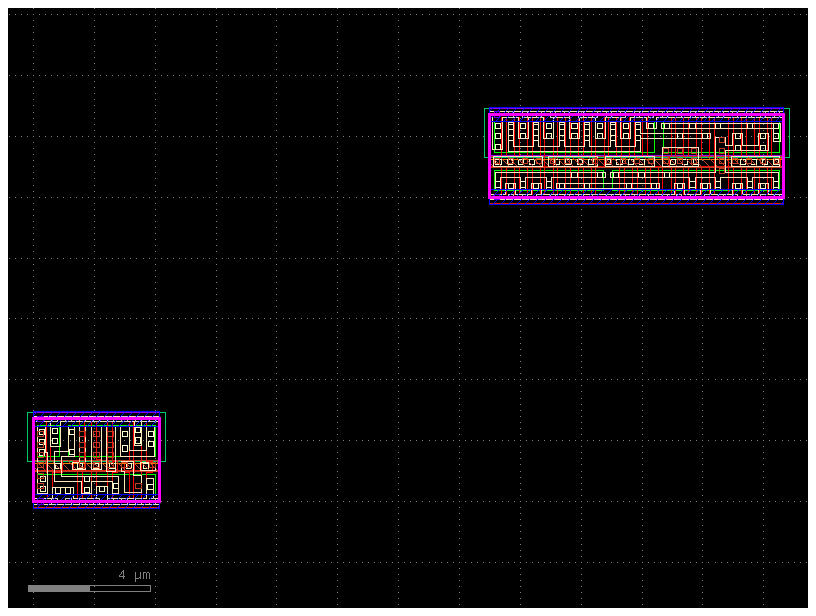

In [12]:
c = gf.Component()
g1 = c << sc.sky130_fd_sc_hd__a2111o_1()
g2 = c << sc.sky130_fd_sc_hd__a311oi_4()
g2.move((15, 10))
c

demo_connect: uid c754374d, ports [], references ['sky130_fd_sc_hd__a2111o_1_1', 'sky130_fd_sc_hd__a311oi_4_1', 'wire_corner_1', 'straight_1', 'straight_2'], 0 polygons

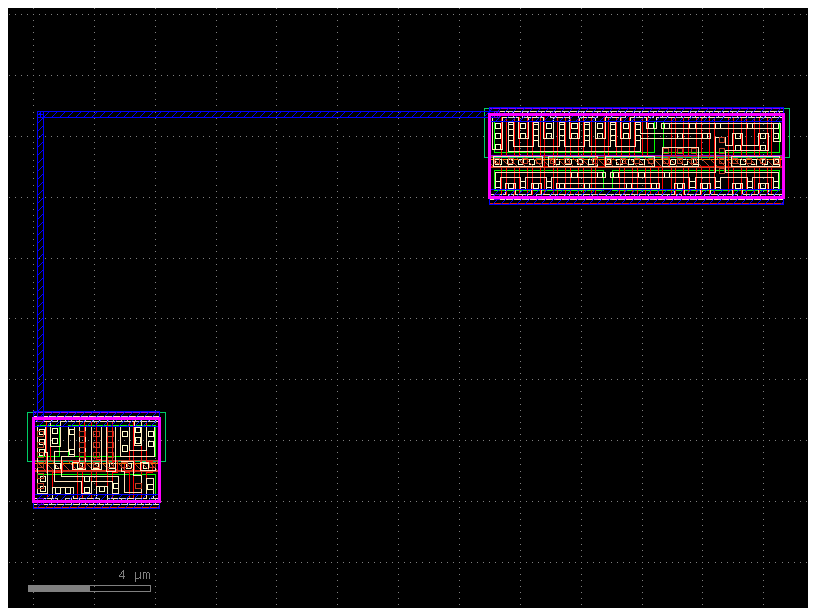

In [13]:
c = gf.Component("demo_connect")
g1 = c << sc.sky130_fd_sc_hd__a2111o_1()
g2 = c << sc.sky130_fd_sc_hd__a311oi_4()
g2.move((15, 10))
route = gf.routing.get_route_electrical(
    g1.ports["VPWR"], g2.ports["VPWR"], cross_section=st.xs_metal1
)
c.add(route.references)
c

In [14]:
scene = c.to_3d()
scene.show()

<IPython.core.display.HTML object>

## Netlist driven flow

For netlist driven flow you can define circuits for place and route. You have two options:

1. in python
2. in YAML

## Spice simulations

You can use `PySpice` for running simulations.

gdsfactory can extract the netlist and simulate the circuit.

TODO: add some relevant examples.